# Farey Diagrams
I will write matplotlib scripts to draw Farey diagrams.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

## Drawing a circle

(-1.5, 1.5)

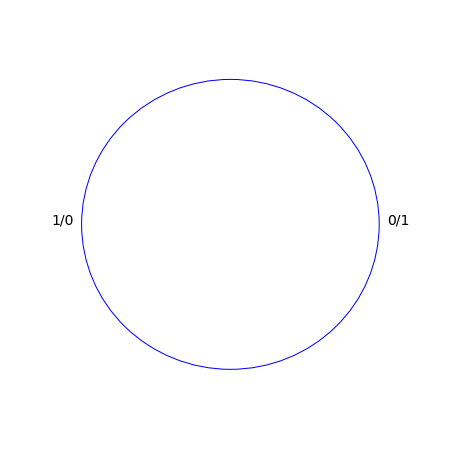

In [33]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

circle = mpatches.Circle((0,0),radius=1,color="b",fill=False)

ax.add_artist(circle)

def plot_point(ax,theta,label):
    x = np.cos(theta)
    y = np.sin(theta)
    if (x > 0):
        eps = 0.05
        ax.text(x+eps*x,y+eps*y,label,size=14)
    else:
        eps = 0.20
        ax.text(x+eps*x,y+eps*y,label,size=14)
    return

plot_point(ax,0,"0/1")
plot_point(ax,np.pi,"1/0")
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

## Farey Diagram
Denote each point as (angle,numerator,denominator). Start with 0/1 and 1/0, use the mediant rule to build the diagram.

In [52]:
# (angle,num,den)
p1 = (0,0,1)
p2 = (np.pi,1,0)

points = [p1,p2]

def next_pt(p1,p2,p_arr):
    # break condition
    if p2[0] - p1[0] < np.pi/8:
        return
    else:
        num = p1[1] + p2[1]
        den = p1[2] + p2[2]
        p_next = (0.5*(p1[0] + p2[0]),num,den)
        p_arr.append(p_next)
        
        next_pt(p1,p_next,p_arr)
        next_pt(p_next,p2,p_arr)
        return


In [53]:
p_arr = [p1,p2] 
next_pt(p1,p2,p_arr)
print(p_arr)
len(p_arr)

[(0, 0, 1), (3.141592653589793, 1, 0), (1.5707963267948966, 1, 1), (0.7853981633974483, 1, 2), (0.39269908169872414, 1, 3), (0.19634954084936207, 1, 4), (0.5890486225480862, 2, 5), (1.1780972450961724, 2, 3), (0.9817477042468103, 3, 5), (1.3744467859455345, 3, 4), (2.356194490192345, 2, 1), (1.9634954084936207, 3, 2), (1.7671458676442586, 4, 3), (2.1598449493429825, 5, 3), (2.748893571891069, 3, 1), (2.552544031041707, 5, 2), (2.945243112740431, 4, 1)]


17

### Hypocycloid
The connecting arcs are given by hypocycloids

\begin{align*}
x(\theta) &= (R - r) \cos(\theta) + r\cos \frac{R -r}{r} \theta \\
y(\theta) &= (R - r) \sin(\theta) + r\sin \frac{R -r}{r} \theta \\
\end{align*}

In [47]:
def hypocycloid(R,r,theta_vec):
    '''
    Returns the (x,y co-ordinates)
    '''
    x_vec = (R-r)*np.cos(theta_vec) + r*np.cos((R-r)*theta_vec/r)
    y_vec = (R-r)*np.sin(theta_vec) - r*np.sin((R-r)*theta_vec/r)
    return x_vec,y_vec

(-1.5, 1.5)

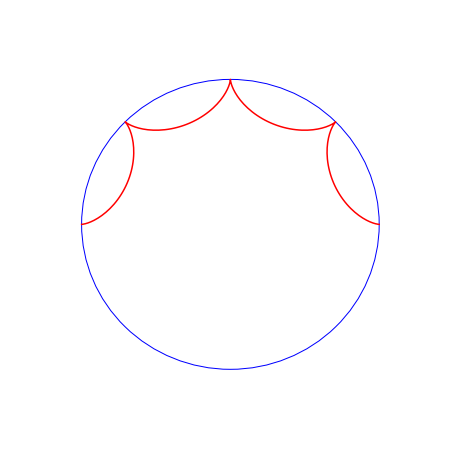

In [55]:
R = 1
r = 0.125
theta_vec = np.linspace(0,np.pi,250)
x,y = hypocycloid(R,r,theta_vec)

fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

circle = mpatches.Circle((0,0),radius=1,color="b",fill=False)
ax.add_artist(circle)

plt.plot(x,y,'r')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

## Farey Diagram

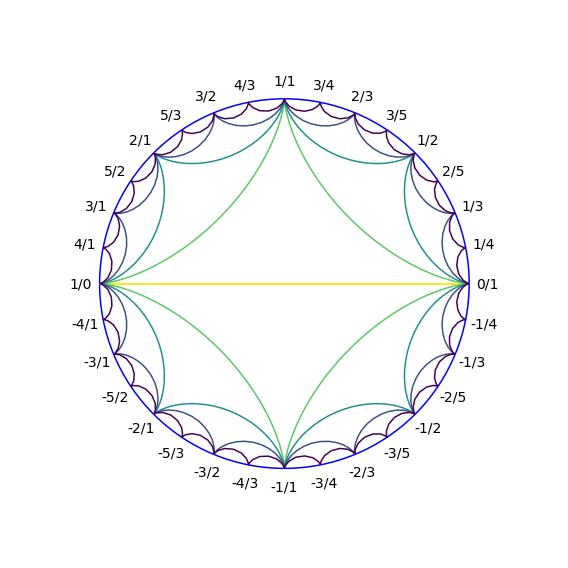

In [100]:
fig = plt.figure(figsize=(8,8))
ax = plt.gca()
# to remove frame box and axes
ax.axis("off")

circle = mpatches.Circle((0,0),radius=1,color="b",fill=False,linewidth=1.5)

ax.add_artist(circle)

def plot_point(ax,p):
    theta = p[0]
    
    eps = 0.1
    x = np.cos(theta)
    x_label = (1 + eps)*x
    y = np.sin(theta)
    y_label = (1 + eps)*y
    
    label = "{:d}/{:d}".format(p[1],p[2])
    text_size=14
    # center alignment ensures that the center of the text is given by the co-ordinate
    ax.text(x_label,y_label,label,horizontalalignment='center',verticalalignment='center',size=text_size)
    
    # also plot the point below x-axis
    if y > 0.01:
        label = "{:d}/{:d}".format(-p[1],p[2])
        ax.text(x_label,-y_label,label,horizontalalignment='center',verticalalignment='center',size=text_size)
    return

for p in p_arr: 
    plot_point(ax,p)

    

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])

max_hypo_index = np.int(np.log2(len(p_arr)))
theta_vec = np.linspace(0,2*np.pi,250)

cmap = plt.get_cmap('viridis_r')
colors = cmap(np.linspace(0,1,max_hypo_index+1))
for i in range(1,max_hypo_index+2):
    R = 1
    r = 1/2**i
    x,y = hypocycloid(R,r,theta_vec)
    plt.plot(x,y,linewidth=1.5,color=colors[i-1])
plt.tight_layout()
plt.savefig("./saved_figs/farey.jpg",dpi=300)